In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [15]:
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from dataclasses import dataclass

import vice
import pickle

import sys
sys.path.append("../..")

In [16]:
import surp.analysis_scripts.apogee_analysis as aah
from surp.analysis_scripts.vice_model import vice_model
import surp.analysis_scripts.plotting_utils as pluto
import surp.analysis_scripts.gas_phase_data
import surp.analysis_scripts.rc_params

In [17]:
sf = pluto.fig_saver("../figures")

In [18]:
@dataclass
class model_id():
    agb: str = None
    eta: str = None
    f_agb: str = None
    beta: str = None
    name: str = None
    version: str = ""
    

In [19]:
def find_model(id):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the vice_model object
    """
    if id.name is None:
        name = id.agb + "_f" + id.f_agb + "_Z" + id.beta + "_eta" + id.eta + id.version
    else:
        name = id.name
    file_name = "../output/" + name + ".json"
    return vice_model(file_name)

In [20]:
def compare_cooh(models, ax=None):
    if ax is None:
        ax = plt.gca()
        
    name_0 = list(models.keys())[0]
    i = 0
    for name, model in models.items():
        f = model.plot_mean_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.6), label=name, plot_data=False, ax=ax)
        i+= 1
    # legend_outside()
    aah.plot_cooh()
    return f    

    
def compare_coofe_stars(models):
    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_coofe(star_group="apogee", o_h_0=o)
            plt.xlim(-0.6, 0.4)
            plt.title("%s, [o/h]=%1.1f" % (name, o))
            plt.show()
            
def compare_cooh_stars(models):
    for name, model in models.items():
        model.plot_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.6), label=name)
        plt.title(name)
        plt.show()

In [21]:
def compare_coofe(models):
    name_0 = list(models.keys())[0]

    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_mean_coofe(xlim=(-0.6, 0.4), label=name, plot_data=name==name_0, o_h_0=o, star_group="apogee")
        plt.title("[O/H] = %1.1f" % o)
        pluto.legend_outside()  
        plt.show()

def compare_coofe_stars(models):
    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_coofe(star_group="apogee", o_h_0=o)
            plt.xlim(-0.6, 0.4)
            plt.title("%s, [o/h]=%1.1f" % (name, o))
            plt.show()

In [22]:
def plot_coofe(models, o0=-0.0, ax=None):
    
    if ax is None:
        ax = plt.gca()
    
    name_0 = list(models.keys())[0]

    for o in [o0]:
        for name, model in models.items():
            model.plot_mean_coofe(xlim=(-0.3, 0.3), label=name, plot_data=name==name_0, o_h_0=o, star_group="apogee", ax=ax)
        ax.set_title("[O/H] = %1.1f" % o)
        # legend_outside()  
        # plt.show()


In [23]:
def compare_mdf(models):
    for ratio in ["[o/h]", "[fe/h]", "[o/fe]", "[c/o]", "[c/h]"]:
        for name, model in models.items():
            model.plot_mdf(ratio, label = name, xlim=(-1.5, 1))
        legend_outside()
        plt.show()

In [24]:
def compare_stars(model_names, labels=None):
    if labels is None:
        labels = model_names
        
    models = {label: find_model(name) for label, name in zip(labels, model_names)}
    
    compare_cooh_stars(models)
    compare_coofe_stars(models)

In [25]:
def compare(names, labels):
    models = {label: find_model(name) for name, label in zip(names, labels)}
    
    fig, axs = pluto.dual_plot()
    
    plt.sca(axs[0])
    compare_cooh(models)  

    axs[0].set(
        xlabel = r"[$\alpha$/H]",
        ylabel = r"[C/$\alpha$]", 
        xlim = (-0.6, 0.6), 
        ylim = (-0.5, 0.2),
        # xticks = [-0.6, -0.4, -0.2, 0, 0.2]
    )
    
    plt.sca(axs[1])
    plot_coofe(models)
    pluto.fancy_legend()
    
    axs[1].set(
        xlabel = r"[$\alpha$/Fe]",
        ylabel = "",
        title = "",
        xlim = (-0.15, 0.4),
       # xticks = [-0.1, -0.2, -0.1, 0, 0.1]
    )


# Deep exploration of fiducial model

In [36]:
fiducial.plot_stars?

Signature:
fiducial.plot_stars(
    x,
    y,
    c=None,
    c_label=None,
    xlim=None,
    star_group='all',
    **kwargs,
)
Docstring: <no docstring>
File:      ~/surp/analysis_scripts/vice_model.py
Type:      method


In [35]:
fiducial = find_model(model_id(agb="cristallo11", f_agb="0.2", eta="1.0", beta="0.4", version="_v0.1.3"))

fiducial.plot_stars("[o/fe]", "[c/o]", c="R_origin", c_label="R", alpha=0.2)

KeyError: 'R_origin'

RuntimeError: latex was not able to process the following string:
b'O_FE'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/PAS2232/aeyobd/.cache/matplotlib/tex.cache/0433602d58db81cf137b793183ce
eb61.tex
LaTeX2e <2019-10-01> patch level 3
(/apps/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/10/25 v1.4k Standard LaTeX document class
(/apps/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(/apps/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/cm-super/type1ec.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/t1cmr.fd))
(/apps/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(/apps/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/ifvtex.sty
(/apps/texlive/2018/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amstext.sty
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/apps/texlive/2018/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/apps/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file 0433602d58db81cf137b793183ceeb61.aux.
(/apps/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily O_
                  FE}
No pages of output.
Transcript written on 0433602d58db81cf137b793183ceeb61.log.




<Figure size 360x360 with 1 Axes>

In [ ]:
h = fiducial.history.set_index(["time", "R"])

In [ ]:
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2, wspace=0)
axs = gs.subplots(sharey=True)

plt.sca(axs[0])
model.plot_R_slices("[o/h]", "[c/o]", ax=axs[0])

# for t in [2, 5, 8, 11, 13]:
#     for R in [4, 6, 8, 10, 12]:
#         df = h.loc[t, R]bbox_inches = "tight"
#         plt.scatter(df["[o/h]"], df["[c/o]"])

axs[0].set(
    xlim=(-1, 0.6),
    ylim=(-0.4, 0.3),
    xlabel="[O/H]",
    ylabel="[C/O]",
    #xticks=(-0.75, -0.5, -0.25, 0, 0.25, 0.5)
)

fiducial.plot_R_slices("[o/fe]", "[c/o]", ax=axs[1], legend=False)
axs[1].set(
    ylabel="",
    xlabel="[O/Fe]"
)

sf("evo_tracks")

## Out of Box AGB models

In [26]:
names = []
for agb in ["cristallo11", "karakas10", "ventura13", "karakas16"]:
    names.append(model_id(agb=agb, f_agb="o", beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["C11", "K10", "V13", "K16"]
models = {label: find_model(name) for name, label in zip(names, labels)}

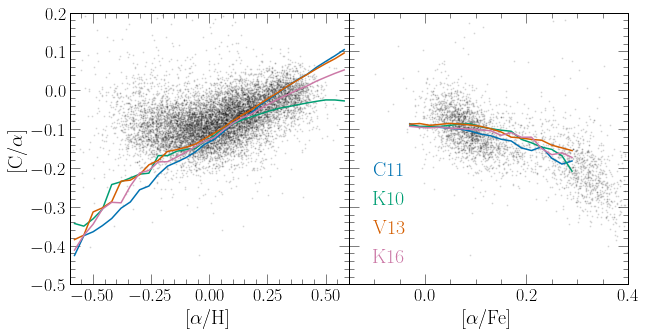

In [28]:
compare(names, labels)
sf("oob_agb")

# Messing with da yields